In [262]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
%matplotlib inline

In [263]:
df=pd.DataFrame()
df=pd.read_excel('Nifty_monthly_OHLC.xlsx',header=[0],parse_dates=[0])

df.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,2003-03-01,978.20,1063.55,1070.85,974.1,894.12M,-0.0801
1,2003-04-01,934.05,977.40,1033.45,920.0,1.21B,-0.0451
2,2003-05-01,1006.80,930.90,1013.85,930.8,1.28B,0.0779
3,2003-06-01,1134.15,1006.85,1141.30,1004.7,1.47B,0.1265
4,2003-07-01,1185.85,1133.95,1198.50,1089.3,1.77B,0.0456


In [264]:
df=df.iloc[:,[0,1]]
df.head()
#convert from string to datetime
df = df.set_index(['Date'])
df.head(5)

,Price
Date,
2003-03-01,978.20
2003-04-01,934.05
2003-05-01,1006.80
2003-06-01,1134.15
2003-07-01,1185.85


In [265]:
df['Price'].dtype

dtype('float64')

In [282]:
a=np.log(1 + df.pct_change())
a

,Price
Date,
2003-03-01,NaN
2003-04-01,-0.046184
2003-05-01,0.075002
2003-06-01,0.119106
2003-07-01,0.044576
...,...
2020-11-01,0.107904
2020-12-01,0.075195
2021-01-01,-0.025142


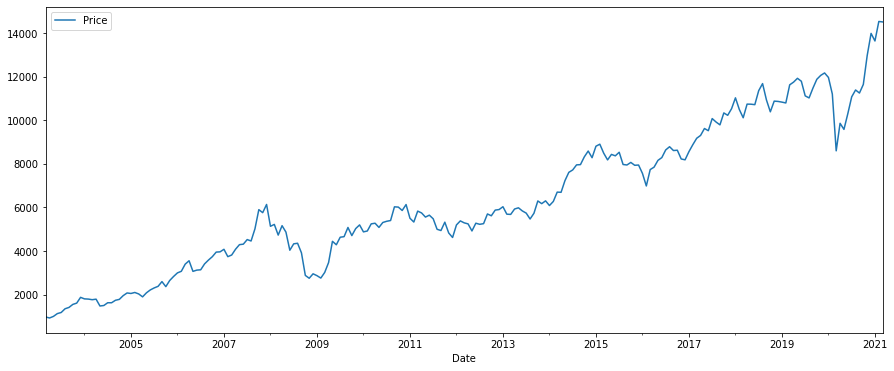

In [268]:
df.plot(figsize=(15,6))


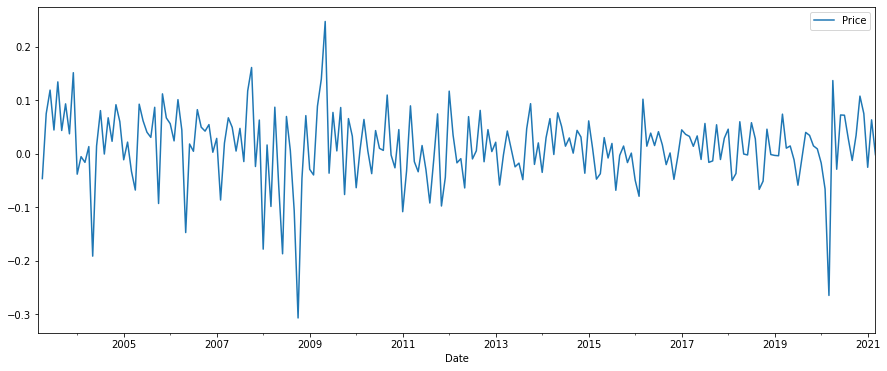

In [269]:
a.plot(figsize=(15,6)) #WE are getting descrete graph as timestamp between them was missing


In [270]:
u = a.mean()
var = a.var()

In [271]:
drift = u - (0.5*var)
drift

Price    0.010242
dtype: float64

In [272]:
x = np.random.rand(10,2)
x

array([[0.96483863, 0.7170139 ],
       [0.85912331, 0.71764781],
       [0.01221924, 0.01856493],
       [0.88575375, 0.55734097],
       [0.04764117, 0.5999335 ],
       [0.78781823, 0.70954089],
       [0.70412968, 0.42376023],
       [0.03533251, 0.61353364],
       [0.33540278, 0.73971005],
       [0.79755016, 0.87456017]])

In [273]:
norm.ppf(x)

array([[ 1.80982627,  0.57399349],
       [ 1.07638888,  0.57586805],
       [-2.25016501, -2.08433325],
       [ 1.20425121,  0.14423099],
       [-1.66816821,  0.25317497],
       [ 0.79887389,  0.55204399],
       [ 0.53631534, -0.19228311],
       [-1.80762416,  0.28854091],
       [-0.42504269,  0.64245175],
       [ 0.83290258,  1.14821539]])

In [274]:
stddev = a.std()


In [275]:
Z = norm.ppf(np.random.rand(50,10000))
Z

array([[ 0.53615773, -0.31811258,  0.26731843, ...,  0.80113042,
         0.18917531, -2.34140914],
       [ 0.84983486,  1.45744857, -0.53781561, ..., -1.06367117,
         2.01175609, -1.42189616],
       [-1.21748163,  0.87524977, -0.7036409 , ..., -0.14421389,
        -0.42673406, -1.12120461],
       ...,
       [ 1.12346393,  0.2702568 ,  0.20409657, ..., -1.10785693,
        -0.22706927, -2.35441907],
       [-0.41192783, -0.02476942,  0.63369312, ..., -0.46403155,
         0.07144016,  0.34462714],
       [-0.58955143, -0.80701261, -0.68482968, ..., -1.07820969,
        -0.27662254,  0.18105695]])

In [276]:
t_intervals = 1000
iterations = 10
values= np.exp(drift.values + stddev.values * norm.ppf(np.random.rand(50,1000)))
values

array([[0.96603843, 1.00075691, 0.94542226, ..., 0.96041774, 0.92146209,
        1.02516741],
       [1.01348252, 1.1063562 , 1.03676211, ..., 1.02210036, 1.00116826,
        0.92360936],
       [0.92866468, 1.12896063, 1.01047541, ..., 1.02305217, 1.01142141,
        1.12423222],
       ...,
       [0.94159253, 0.94103057, 1.17141229, ..., 1.00361862, 1.06604009,
        0.9511038 ],
       [0.9622064 , 1.01494607, 1.01304859, ..., 0.94011986, 1.01446988,
        0.95478447],
       [1.12982539, 1.08392678, 1.11884786, ..., 1.0618252 , 0.98462891,
        1.04598538]])

In [283]:
S0 = df.iloc[-1]
S0

Price    14507.3
Name: 2021-03-01 00:00:00, dtype: float64

In [278]:
price_list = np.zeros_like(values)
price_list.shape

(50, 1000)

In [284]:
price_list[0] = S0
price_list

array([[14507.3, 14507.3, 14507.3, ..., 14507.3, 14507.3, 14507.3],
       [    0. ,     0. ,     0. , ...,     0. ,     0. ,     0. ],
       [    0. ,     0. ,     0. , ...,     0. ,     0. ,     0. ],
       ...,
       [    0. ,     0. ,     0. , ...,     0. ,     0. ,     0. ],
       [    0. ,     0. ,     0. , ...,     0. ,     0. ,     0. ],
       [    0. ,     0. ,     0. , ...,     0. ,     0. ,     0. ]])

In [285]:
for t in range(1,50):
    price_list[t] = price_list[t-1]*values[t]

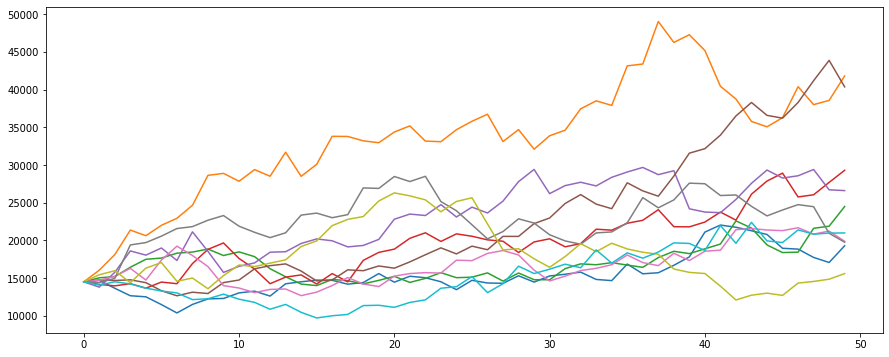

In [287]:
plt.figure(figsize=(15,6))
plt.plot(pd.DataFrame(price_list).iloc[:,0:10])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Values of next 50 steps')

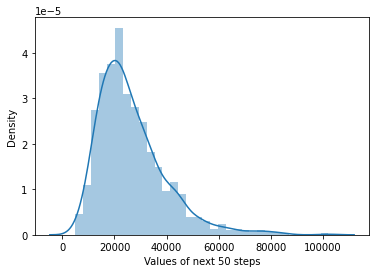

In [288]:
sns.distplot(pd.DataFrame(price_list).iloc[-1])
plt.xlabel("Values of next 50 steps")